In [62]:
# Importing the necessary modules 
import os 
import cv2 
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import MaxPooling2D 

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import csv
import glob
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


C:\Users\sagun\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['contour']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Reading Image Data

In [19]:
# Getting the path to the working directory 
workingDir = "./raw_data/"
PATH = os.path.sep.join([workingDir, ""])

# Getting the path ot the training directory 
train_dir = os.path.join(PATH, "cell_images")

# Getting the path to the validation directory 
validation_dir = os.path.join(PATH, "cell_images")

In [20]:
# Getting the path to the directory for the parasitized training cell images and 
# the getting the path to the directory for the uninfected training cell images 
parasitized_train_dir = os.path.join(train_dir, "Parasitized")
uninfected_train_dir = os.path.join(train_dir, "Uninfected")

# Getting the path to the directory for the parasitized validation cell images and 
# the path to the directory for the uninfected validation cell images 
parasitized_val_dir = os.path.join(validation_dir, "Parasitized") 
uninfected_val_dir = os.path.join(validation_dir, "Uninfected")

# EDA

<h1>Understanding The Data</h1>
Let us look at how many parasitized and ininfected cell images are present

In [21]:
# Getting the number of images present in the parasitized training directory and the 
# number of images present in the uninfected training directory 
parasitized_images = len(os.listdir(parasitized_train_dir))
uninfected_images = len(os.listdir(uninfected_train_dir))

# Getting the number of images present in the parasitized validation directory and the 
# number of images present in the uninfected validation directory 
parasitized_images_val = len(os.listdir(parasitized_val_dir)) 
uninfected_images_val = len(os.listdir(uninfected_val_dir)) 

# Getting the sum of both the training images and validation images 
total_train = parasitized_images + uninfected_images  
total_val = parasitized_images_val + uninfected_images_val 

# Displaying the results for Training images  
print("Total Training parasitized images: {}".format(parasitized_images)); 
print("Total Training uninfected images: {}".format(uninfected_images)); 
print("__________________________________________________________________________________________________________\n");

# Displaying the results for Validation images  
print("Total Validation parasitized images: {}".format(parasitized_images_val)); 
print("Total Validation uninfected images: {}".format(uninfected_images_val)); 
print("__________________________________________________________________________________________________________\n"); 

# Displaying the total values for the images in both the training and validation directory 
print("Total Train: {}".format(total_train)); 
print("Total Validation: {}".format(total_val)); 

Total Training parasitized images: 13780
Total Training uninfected images: 13780
__________________________________________________________________________________________________________

Total Validation parasitized images: 13780
Total Validation uninfected images: 13780
__________________________________________________________________________________________________________

Total Train: 27560
Total Validation: 27560


In [29]:
# Setting the batch size,image height and width parameters 
batch_size_train = 11023
batch_size_valid = 2756
IMG_HEIGHT = 98 
IMG_WIDTH = 98 

In [30]:
# Creating the generator for our training images data and for our validation images data 
train_image_gen = ImageDataGenerator(rescale = 1.0 / 255.0)
validation_image_gen = ImageDataGenerator(rescale = 1.0 / 255.0) 

# Getting the training images from the train directory by using the flow from directory method 
# to load the images with a stated batch size and an image height and width. 
train_data_gen = train_image_gen.flow_from_directory(batch_size = batch_size_train, 
                                                    directory = train_dir, 
                                                    shuffle = True, 
                                                    target_size = (IMG_HEIGHT, IMG_WIDTH), 
                                                    class_mode = "binary")

# Getting the validation images from the validation directory by using the flow from_from_directory method 
# to load the images, shuffle them, and resize them with an image height and a specified width value. 
validation_data_gen =validation_image_gen.flow_from_directory(batch_size = batch_size_valid, 
                                                             directory = validation_dir, 
                                                             shuffle = True, 
                                                             target_size = (IMG_HEIGHT, IMG_WIDTH), 
                                                             class_mode = "binary")

Found 27558 images belonging to 2 classes.
Found 27558 images belonging to 2 classes.


# Visualize the data

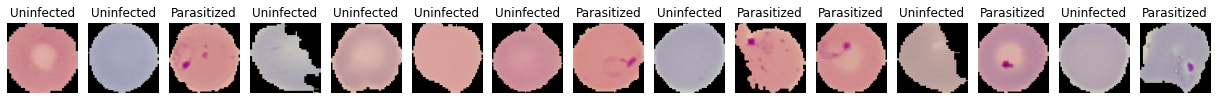

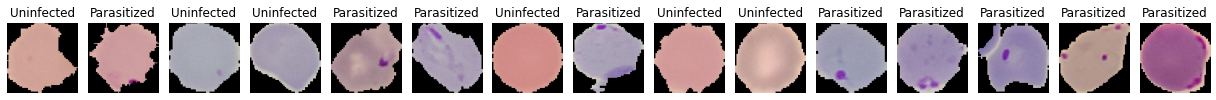

In [31]:
# Getting the images and labels from the training data generator 
sample_training_images, train_label = next(train_data_gen) 

# Getting the images and labels from the training data generator 
sample_training_images, train_label = next(train_data_gen) 

# Getting the images and labels from the validation data generator 
sample_validation_images, val_label = next(validation_data_gen) 

# Defining a function to plot the images in the form of a grid with 1 row and 15 columns where the 
# Images are placed in each column with their respective labels 
def plotImages(images, batch=None): 
    global train_data_gen 
    fig, axes = plt.subplots(1, 15, figsize=(17, 20))
    # Flatten the axes 
    axes = axes.flatten() 
    # Creating a loop to loop throught the image directory and plot the images 
    for img, ax, labels in zip(images, axes, batch): 
        # Extracting the respective labels or tags for the plotted images 
        for key, value in train_data_gen.class_indices.items(): 
            # Converting the labels into integer values 
            labels = int(labels) 
            # Plotting the images by the label key value for the respective goten integer value 
            if value == labels: 
                ax.set_title(key) 
                ax.imshow(img) 
                ax.axis("off")
                
    # Displaying the plot 
    plt.tight_layout() 
    plt.show() 
    
    
# Plotting 15 random images from the sample training images with its respective labels 
plotImages(sample_training_images[:15], train_label[:15])

# Plotting 15 images from the sample validation images 
plotImages(sample_validation_images[:15], val_label[:15])


# Pre Processing Image Data

In [39]:
def plot_image(path):
    img = mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.show()

Lets take a Parastized Image and preprocess it 

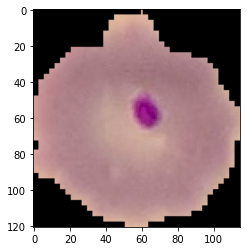

In [42]:
Parastized_img_path = "raw_data/cell_images/Parasitized/C33P1thinF_IMG_20150619_121229a_cell_177.png"
plot_image(Parastized_img_path)

In [43]:
im = cv2.imread(Parastized_img_path)

Applying Gaussian Blur to the image

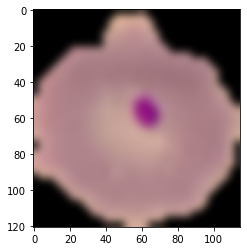

In [46]:
im = cv2.GaussianBlur(im,(5,5),2) #(5,5) is the mask the larger the size better the blur
step2_path = 'Parastized_GaussianBlur.png'
cv2.imwrite(step2_path, im)
plot_image(step2_path)

Converting it to gray scale as will help models easily understand the images

In [51]:
#convert to grayscale image
im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
step3_path = 'Parastized_Gray.png'
cv2.imwrite(step3_path , im_gray)

True

<img src='Parastized_Gray.png'>

changing threshold inorder to identify contours

In [55]:
ret,thresh = cv2.threshold(im_gray,127,255,0)
step4_path = 'Parastized_White.png'
cv2.imwrite(step4_path, thresh)

True

<img src='Parastized_White.png'>

Highlighting contour area

In [56]:
contours,_ = cv2.findContours(thresh,1,2)
for contour in contours:
        cv2.drawContours(im_gray, contours, -1, (0,255,0), 3)
step5_path = 'Parastized_Contour.png'
cv2.imwrite(step5_path, im_gray)

True

<img src='Parastized_Contour.png'>

Calculating area and preparing the data set

In [79]:
temp = []
for i in range(5):
    try:
        area = cv2.contourArea(contours[i])
        #file.write(str(area))
        temp.append(str(area))
    except:
        #file.write("0")
        temp.append(str(0))
print("Area = ")
temp

Area = 


['221.0', '9086.5', '0', '0', '0']

# Applying Above Steps to Every Image and Calculating Contour Area

In [69]:
# CPU Intesive Task takes time to generate a data set
label = ["Parasitized","Uninfected"]
for l in label:
    dirList = glob.glob("cell_images/"+l+"/*.png")
    file = open("csv/data.csv","a")

    for img_path in dirList:

        im = cv2.imread(img_path)

        im = cv2.GaussianBlur(im,(5,5),2)



        im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

        ret,thresh = cv2.threshold(im_gray,127,255,0)
        contours,_ = cv2.findContours(thresh,1,2)

        for contour in contours:
            cv2.drawContours(im_gray, contours, -1, (0,255,0), 3)


        cv2.imshow("window",im_gray)

        break


        file.write(label)
        file.write(",")

        for i in range(5):
            try:
                area = cv2.contourArea(contours[i])
                file.write(str(area))
            except:
                file.write("0")

            file.write(",")


        file.write("\n")


    cv2.waitKey(19000)

print("data.csv generation completed!")

data.csv generation completed!


# Working with Generated Dataset

In [71]:
# Reading data from the data set
df = pd.read_csv('csv/data.csv')
df

,Label,area_0,area_1,area_2,area_3,area_4
0,Parasitized,175.5,126.0,131.0,8902.5,0.0
1,Parasitized,222.0,9847.5,0.0,0.0,0.0
2,Parasitized,179.5,256.5,12413.0,0.0,0.0
3,Parasitized,18.0,187.5,9306.5,0.0,0.0
4,Parasitized,142.5,156.5,6669.5,0.0,0.0
...,...,...,...,...,...,...
27553,Uninfected,13228.0,0.0,0.0,0.0,0.0
27554,Uninfected,9757.5,0.0,0.0,0.0,0.0
27555,Uninfected,156.0,9927.5,0.0,0.0,0.0
27556,Uninfected,13384.5,0.0,0.0,0.0,0.0


In [77]:
df.describe()

,area_0,area_1,area_2,area_3,area_4
count,27558.000000,27558.000000,27558.000000,27558.000000,27558.000000
mean,6123.273714,3111.457181,1488.460810,582.339811,303.940144
std,6191.411068,5522.438341,4103.942736,2665.143838,1922.832841
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.500000,0.000000,0.000000,0.000000,0.000000
50%,5703.000000,0.000000,0.000000,0.000000,0.000000
75%,11948.125000,4746.000000,0.000000,0.000000,0.000000
max,30264.000000,39640.500000,34230.000000,41071.500000,30946.000000


In [73]:
#checking for any null values
df.isna().sum()

Label     0
area_0    0
area_1    0
area_2    0
area_3    0
area_4    0
dtype: int64

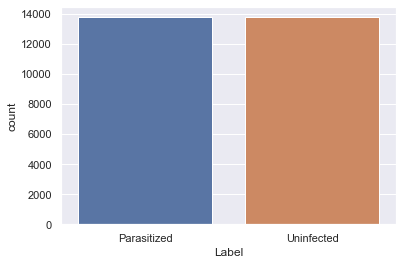

In [74]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Label", data=df)

* We have a balanced dataset for both the classes

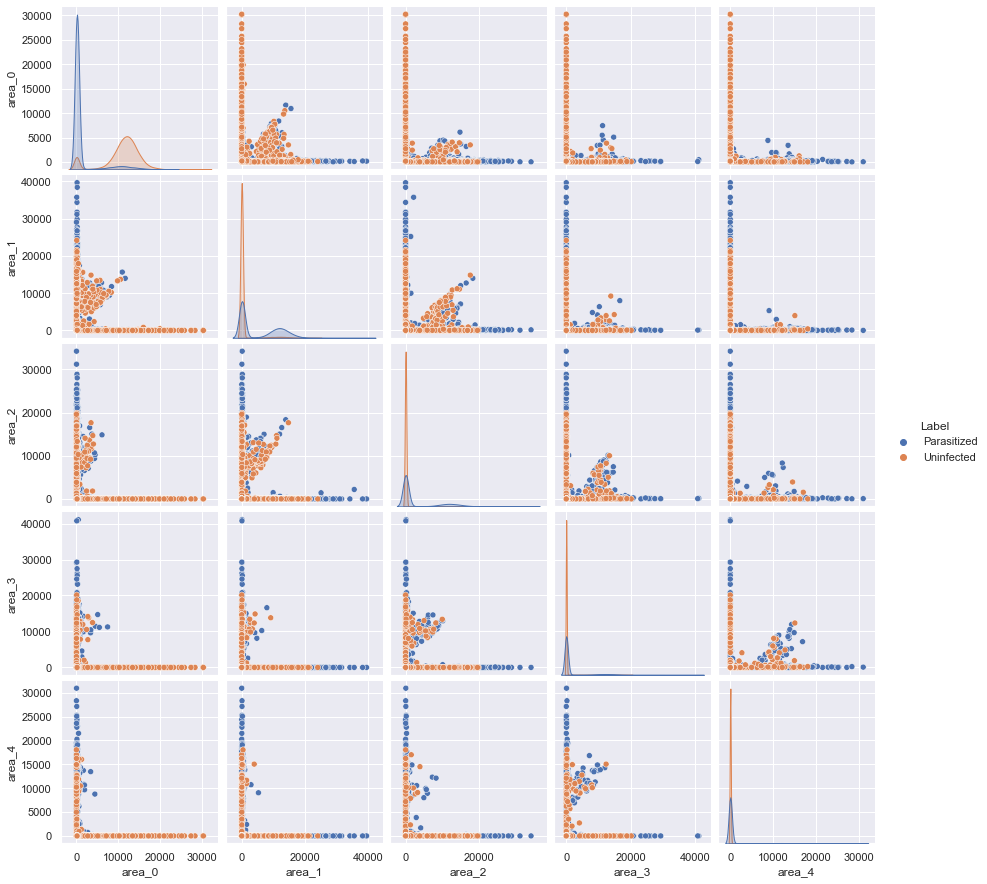

In [76]:
sns.pairplot(df, hue="Label")